In [56]:
import os
import mimetypes
import re
from dotenv import load_dotenv
from google import genai
from google.genai import types

load_dotenv()


True

In [59]:
def graphGenerator(code_string):
    """Generates a graph from a code string using executable code from the code_string."""
    exec(code_string)
    return None


def extract_code(mrk):
    """Extracts code from markdown using regular expressions."""
    # Regex to match code blocks enclosed in triple backticks
    match = re.search(r"```(?:python)?\n(.*?)```", mrk, re.DOTALL)
    return match.group(1).strip() if match else mrk
    

def code_generator(user_prompt, system_prompt, model="gemini-3-flash-preview", api_key=None):
	if api_key is None:
		api_key = os.getenv("GEMINI_API_KEY")
	client = genai.Client(api_key=api_key)
	contents = [
		types.Content(
			role="system",
			parts=[
				types.Part.from_text(text=system_prompt),
			],
		),
		types.Content(
			role="user",
			parts=[
				types.Part.from_text(text=user_prompt),
			],
		),
	]

	generate_content_config = types.GenerateContentConfig(
			thinking_config=types.ThinkingConfig(
			thinking_level="LOW",
		),
	)

	response = client.models.generate_content(
		model=model,
		contents=contents,
		# config=generate_content_config,
	)

	return extract_code(response.text)
    


In [62]:
prompt = '''
## YOUR ROLE: 
Your are a graph, plot, diagrams, charts expert also You are a expert in data analysis and visualization.
You are responsible to write python code to drawing graph, plot, diagrams and charts according the situation, instructions and requirements given to you by User.

## INSTRUCTIONS for You:
* You can use only from following python libraries (matplotlib, seaborn, plotly) to draw graph, plot, diagrams and charts.
* You are responsible to write code that is efficient, clean, and easy to understand.
* You are responsible to write code that is well documented and easy to maintain.
* You are responsible to write code that is well tested and bug free.
* Your code should be able to draw any type of graph or plot according to the user requirements.
* IMPORTANT: **Your code should contain the code to save the graph, plot, diagrams and charts (with name as img.png or video.[xyz])** and to display it (as code will be executed in jupyternotebook).
* Note! Do not write any formatting like (```python, ```html, etc) in the code. Give the code as plain text.
* In case of Circuit diagrams, Make sure to Close the circuit properly.
* Generate code such that It will be Directly executed.

'''


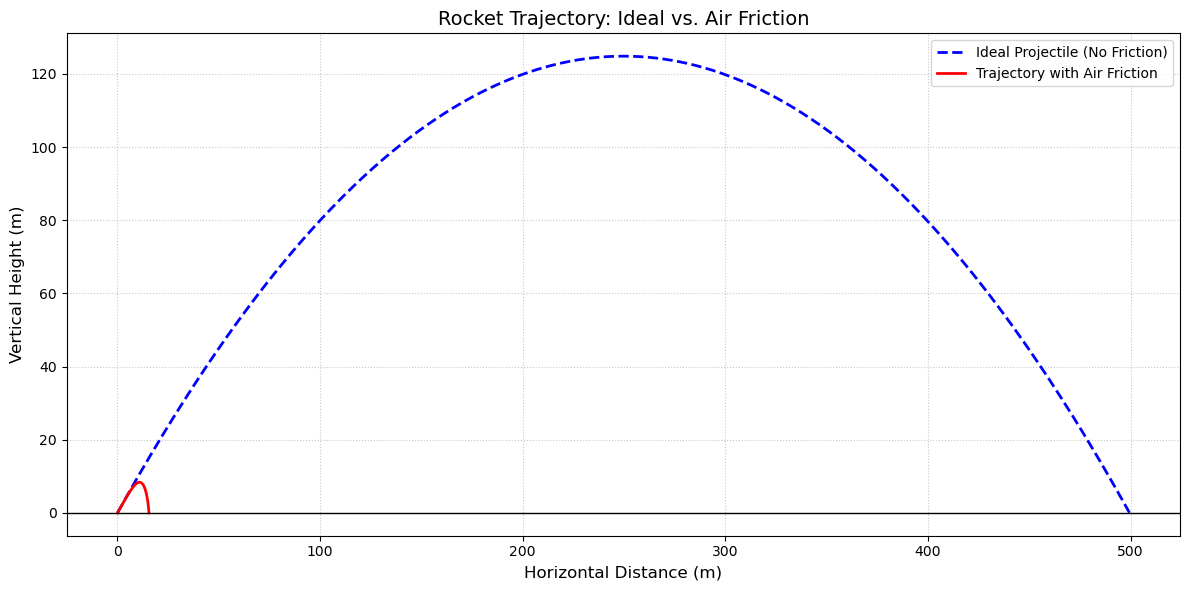

In [63]:
user_prompt = '''
Make chart of the trigectery of the rocket in projectile motion and trigectory in presence of friction.
'''

code = code_generator(user_prompt, prompt, model="gemini-3-flash-preview")
graphGenerator(code)

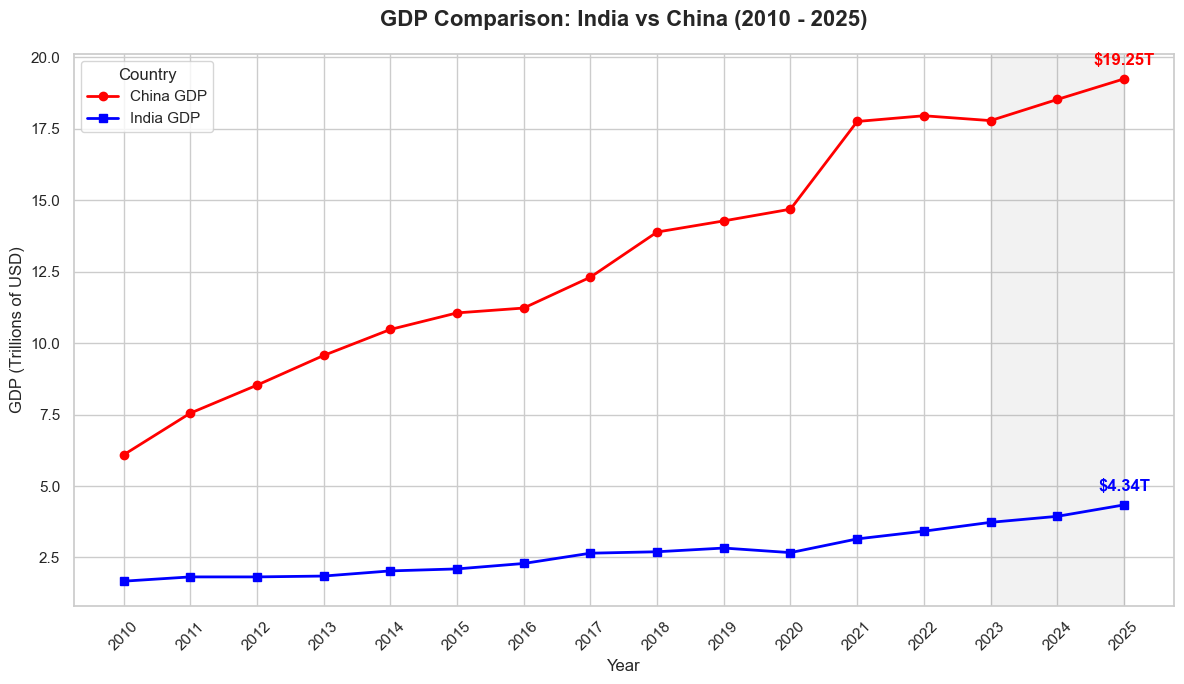

In [64]:
user_prompt = '''
Make a line chart comparing the GDP of India and China from 2010 to 2025.
'''

code = code_generator(user_prompt, prompt, model="gemini-3-flash-preview")
graphGenerator(code)